Read - Mean: 488.29923049640615 Std: 495.12777091013226
Store - Mean: 18685.852974906236 Std: 23919.59327213677


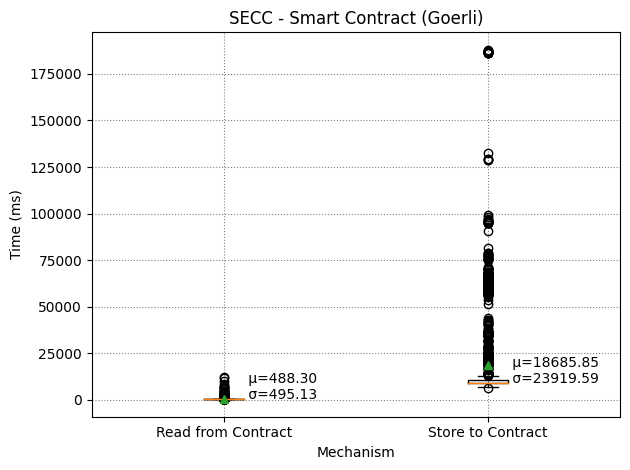

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ['time']

goerliFileRead = 'ProcessingTime/processing_time_bcread.txt'
goerliFileStore = 'ProcessingTime/processing_time_bc_store.txt'

dfReadGoerli = pd.read_csv(goerliFileRead, names=column_names)
dfStoreGoerli = pd.read_csv(goerliFileStore, names=column_names)

# Creating a figure and axis
fig, ax = plt.subplots()

m1_read = dfReadGoerli['time'].mean()
st1_read = dfReadGoerli['time'].std()

m1_store = dfStoreGoerli['time'].mean()
st1_store = dfStoreGoerli['time'].std()

print("Read - Mean:", m1_read, "Std:", st1_read)
print("Store - Mean:", m1_store, "Std:", st1_store)

ax.grid(True, linestyle="dotted", color='grey')

# Creating boxplots
bp = ax.boxplot([dfReadGoerli['time'], dfStoreGoerli['time']], showmeans=True)

# Annotate the boxplots
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1_read if i == 0 else m1_store,
                                         st1_read if i == 0 else st1_store)
    ax.annotate(text, xy=(x, y))

# Set the xticks
xtick_labels = ['Read from Contract', 'Store to Contract']  # Labels for each boxplot
ax.set_xticks([1, 2])  # Position of the xticks
ax.set_xticklabels(xtick_labels)  # Assigning labels to the xticks

# Adding labels and title
plt.xlabel('Mechanism')
plt.ylabel('Time (ms)')
plt.title('SECC - Smart Contract (Goerli)')

plt.savefig('fl_goerli_bc.png',bbox_inches='tight',  dpi=700)	#save image
plt.tight_layout()
plt.show()
